# 1. 라이브러리 설치

In [1]:
!pip install matplotlib

In [2]:
import dlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

# 2. 모델 불러오기

In [3]:
# 학습된 모델 불러오기
detector = dlib.get_frontal_face_detector()
# sp = dlib.shape_predictor("./trained/shape_predictor_68_face_landmarks.dat")
sp = dlib.shape_predictor("./trained/shape_predictor_5_face_landmarks.dat")

# 3.이미지 불러오기

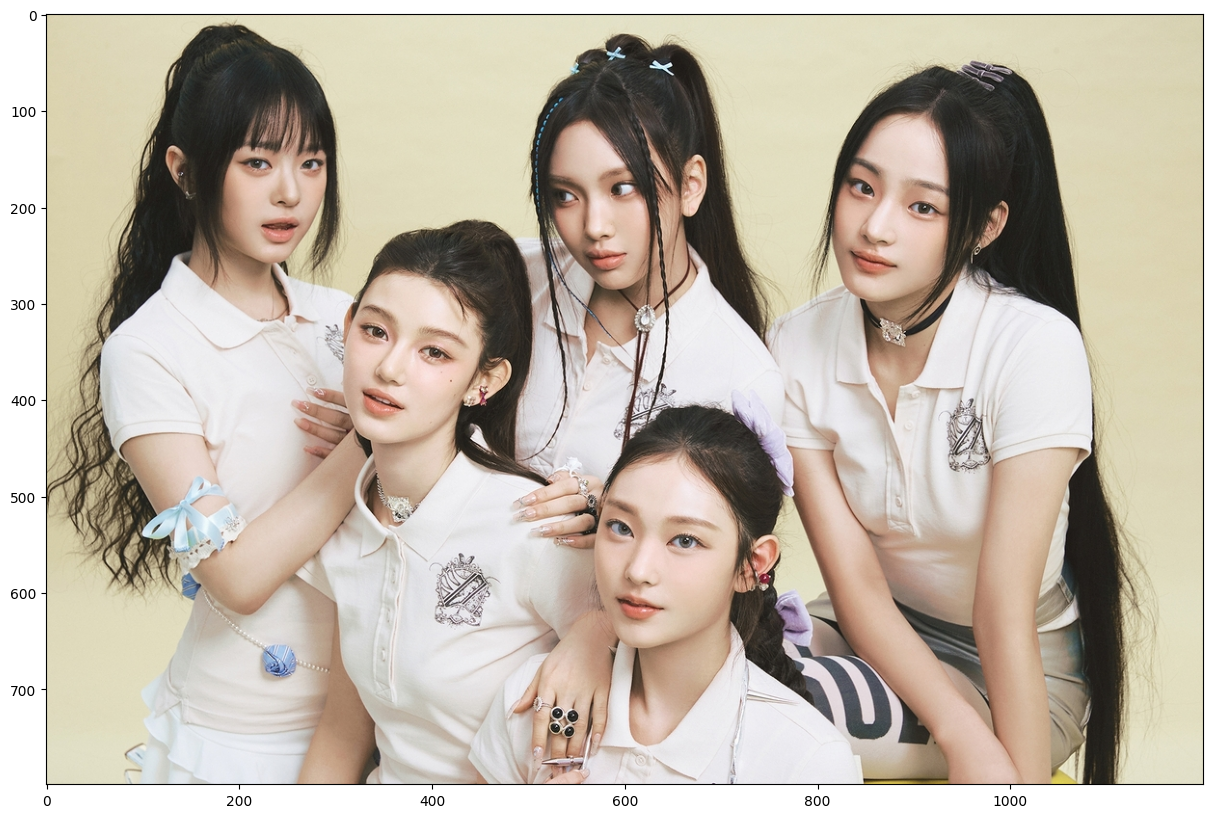

In [4]:
img = dlib.load_rgb_image("./newjeans.png")

plt.figure(figsize=(16,10))
plt.imshow(img)

# 4. 얼굴 부분을 추출

In [5]:
imgs = img.copy()

dets = detector(imgs, 1)

print(dets)

# 결과 rectangles[[(191, 142) (414, 365)]] -> 한명에 대한 얼굴 인식 결과, 여러명 하면 여러개 나옴

rectangles[[(182, 125) (311, 254)], [(287, 288) (442, 442)], [(786, 150) (941, 305)], [(531, 469) (716, 655)], [(494, 133) (648, 288)]]


# 5. 검출된 얼굴 영역을 바운딩 박스(bounding box)

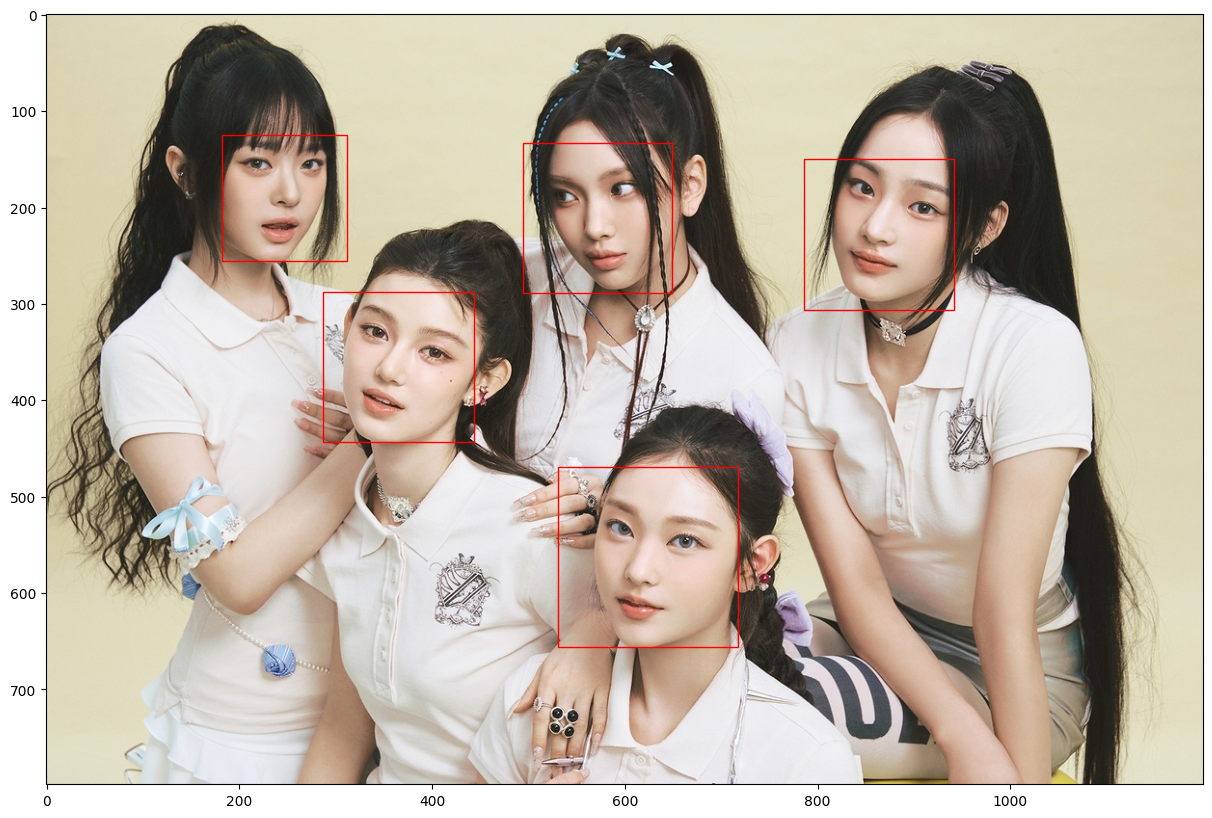

In [6]:
fig, ax = plt.subplots(1, figsize=(16,10))

for det in dets:
    x, y, w, h = det.left(), det.top(), det.width(), det.height()
    rect = patches.Rectangle((x,y), w, h, linewidth=1, edgecolor='r', facecolor='none')
    ax.add_patch(rect)

ax.imshow(imgs)

# 6. 얼굴의 랜드마크(LANDMARK) 추출하기

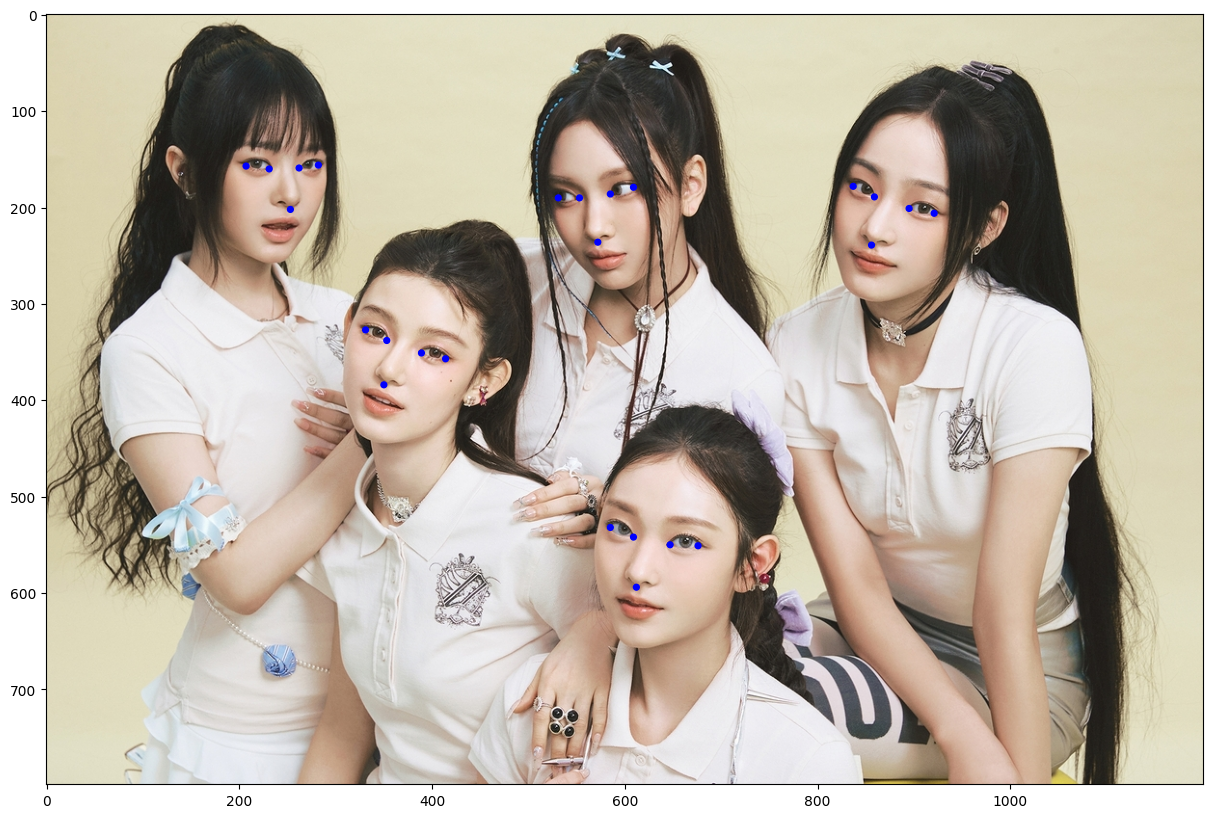

In [7]:
fig, ax = plt.subplots(1, figsize=(16,10))

objects = dlib.full_object_detections()

for det in dets:
    s = sp(img, det)
    print(s)
    objects.append(s)

    for point in s.parts():
        # print(point)
        # 점을 그리는 처리
        circle = patches.Circle((point.x, point.y), radius=3, edgecolor='b', facecolor='b')
        ax.add_patch(circle)
ax.imshow(imgs)